In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers 

In [6]:
ds = tf.keras.preprocessing.image_dataset_from_directory("potato",shuffle=True,image_size=(256,256),batch_size=32)

Found 2152 files belonging to 3 classes.


In [7]:
classes = ds.class_names
classes

['Potato_early_blight', 'Potato_healthy', 'Potato_late_blight']

(256, 256, 3)


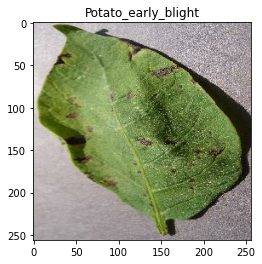

In [8]:
for i,j in ds.take(1):
    plt.imshow(i[0].numpy().astype(int))
    plt.title(classes[j[0]])
    print(i[0].numpy().shape)

In [9]:
train = ds.take(54)
tes = ds.skip(54)
vali = tes.take(7)
test = tes.skip(7)

In [10]:
train = train.cache().shuffle(500)
vali = vali.cache().shuffle(500)
test = test.cache().shuffle(500)

In [11]:
prepro = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [12]:
inpu = (32,256,256,3)
model = models.Sequential([
    prepro,
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=inpu),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(3,activation="softmax")
])

model.build(input_shape=inpu)

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (32, 30, 30, 64)         

In [17]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [18]:
model.fit(train,batch_size=32,validation_data=vali,epochs=20,verbose=1)

Epoch 1/20
54/54 [==============================] - 110s 2s/step - loss: 0.6842 - accuracy: 0.6852 - val_loss: 0.4889 - val_accuracy: 0.8304
Epoch 2/20
54/54 [==============================] - 95s 2s/step - loss: 0.3725 - accuracy: 0.8565 - val_loss: 0.2925 - val_accuracy: 0.8616
Epoch 3/20
54/54 [==============================] - 92s 2s/step - loss: 0.2783 - accuracy: 0.8993 - val_loss: 0.1605 - val_accuracy: 0.9241
Epoch 4/20
54/54 [==============================] - 91s 2s/step - loss: 0.2590 - accuracy: 0.9068 - val_loss: 0.1926 - val_accuracy: 0.9196
Epoch 5/20
54/54 [==============================] - 92s 2s/step - loss: 0.1508 - accuracy: 0.9473 - val_loss: 0.0858 - val_accuracy: 0.9688
Epoch 6/20
54/54 [==============================] - 94s 2s/step - loss: 0.1339 - accuracy: 0.9514 - val_loss: 0.1598 - val_accuracy: 0.9330
Epoch 7/20
54/54 [==============================] - 93s 2s/step - loss: 0.0939 - accuracy: 0.9606 - val_loss: 0.0662 - val_accuracy: 0.9732
Epoch 8/20
54/54 [=

In [19]:
model.evaluate(test)

7/7 [==============================] - 8s 1s/step - loss: 0.1332 - accuracy: 0.9650


[0.13321399688720703, 0.9649999737739563]

In [22]:
model.save(f"../models/potato_model")

INFO:tensorflow:Assets written to: ../models/potato_model\assets
